In [1]:
tt = '''
<html><head><title>Coordinates for
6.2
</title></head><body><font size=+1>
6<sub>2</sub>
(82 vertices)</font><p><pre>
-5.617462 -3.473841 -1.715954
-4.784661 -4.205576 -2.130478
-3.752477 -4.783459 -2.276075
-2.623230 -5.151953 -2.075942
-1.545016 -5.289293 -1.502563
-0.630661 -5.276285 -0.608471
0.185130 -5.302052 0.425964
1.106240 -5.375851 1.307548
2.206969 -5.318813 1.852409
3.371740 -5.044631 2.006761
4.445951 -4.563563 1.803376
5.323282 -3.923639 1.325310
5.955700 -3.172142 0.668625
6.333951 -2.342092 -0.078120
6.464287 -1.452253 -0.838373
6.355216 -0.513631 -1.543590
6.011988 0.457762 -2.123724
5.445613 1.430656 -2.503475
4.688362 2.350765 -2.606043
3.812782 3.148543 -2.372139
2.935201 3.771706 -1.789253
2.178950 4.251023 -0.920677
1.580054 4.736845 0.079235
1.013178 5.371515 0.996592
0.306210 6.138022 1.650525
-0.602141 6.897276 1.938466
-1.654588 7.489418 1.838149
-2.736805 7.792118 1.394105
-3.720957 7.739083 0.698645
-4.492217 7.319305 -0.127152
-4.963279 6.571810 -0.947695
-5.085610 5.580654 -1.625644
-4.860711 4.465666 -2.037917
-4.346871 3.366187 -2.095205
-3.655913 2.412306 -1.765987
-2.919676 1.682323 -1.098295
-2.210456 1.140965 -0.228469
-1.468715 0.602358 0.626347
-0.614399 -0.114367 1.205480
0.295453 -0.987445 1.301294
1.119499 -1.857021 0.868757
1.742911 -2.648545 0.072730
2.145678 -3.519622 -0.777833
2.319293 -4.606842 -1.402246
2.190958 -5.825648 -1.655164
1.720397 -6.967404 -1.511819
0.953389 -7.816717 -1.037505
0.003009 -8.218483 -0.355303
-0.982644 -8.101656 0.382435
-1.848967 -7.486248 1.015354
-2.462873 -6.481082 1.399359
-2.740808 -5.269530 1.426877
-2.674764 -4.075240 1.057382
-2.334789 -3.086085 0.343410
-1.790928 -2.336338 -0.542927
-1.032426 -1.647632 -1.313437
-0.087801 -0.878123 -1.682432
0.907608 -0.116869 -1.519324
1.811456 0.508045 -0.907919
2.602981 1.045401 -0.095381
3.363234 1.695332 0.642358
4.079958 2.571662 1.118673
4.634326 3.646624 1.253762
4.903003 4.808393 1.053129
4.814445 5.914374 0.583318
4.359144 6.827729 -0.052853
3.583129 7.441886 -0.734554
2.573211 7.690801 -1.338204
1.447716 7.559214 -1.746724
0.339732 7.090653 -1.864302
-0.630160 6.393192 -1.632899
-1.409176 5.628936 -1.059019
-2.077619 4.947234 -0.240477
-2.804850 4.369351 0.616841
-3.655913 3.762950 1.284282
-4.548004 3.017957 1.634765
-5.359041 2.136374 1.648774
-5.997714 1.174236 1.372591
-6.416992 0.186332 0.880515
-6.596611 -0.791315 0.250848
-6.527815 -1.738192 -0.441860
-6.202600 -2.639289 -1.123562
</pre></body></html>
'''

In [2]:
with open('knot.txt','w') as fp:
    fp.write(tt)

In [3]:
with open('knot.txt','r') as fp:
    txt = fp.read()

import re
pp = re.compile('<pre>(.*?)</pre>', re.DOTALL)
mm = pp.search(txt)

def row2coords(r):
    return [float(x) for x in r.split(' ')]

pts = [ row2coords(x) for x in mm.group(1).strip().split('\n')]

In [4]:
import numpy as np

X,Y,Z = zip(* pts)


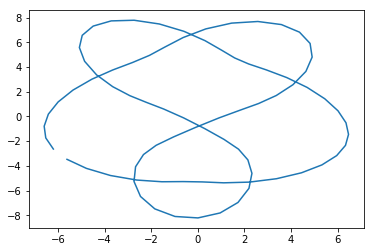

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(X,Y)

In [6]:
def ccw(A,B,C):
    CA = C - A
    BA = B - A
    return CA[1] * BA[0] >  BA[1] * CA[0]

# Return true if line segments AB and CD intersect
def intersect(x,y):
    #print(y)
    A,B = x
    C,D = y
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

In [7]:
L = [[1,0],[1,1],[0,1]]
L.reverse()
A,B,C  = [np.array(x) for x in L]
ccw(A,B,C)

False

In [8]:
pts = [np.array(x) for x in pts]
segs = [(a,b) for a,b in zip(pts,pts[1:])]

In [9]:
cross = []
for i, x in enumerate(segs[:-2]):
    cross.extend([(i, i + j + 2) for j,y in enumerate(segs[i+2:])  if intersect(x,y) ])
        

In [14]:
cross

[(2, 51), (8, 43), (18, 61), (24, 69), (33, 74), (38, 56)]

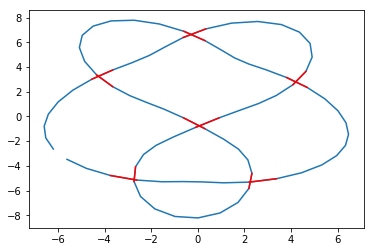

In [10]:
plt.plot(X,Y)
A = np.ones((2,3))
for seg_pair in cross[:]:
    uu = [segs[k] for k in seg_pair]
    for xx in uu:
        A[0,:], A[1,:] = xx
        plt.plot(A[:,0],A[:,1],'r')
    

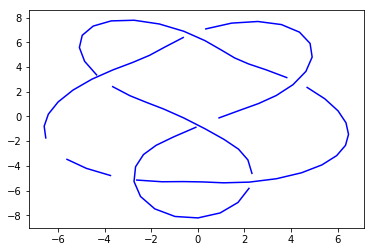

In [11]:
skip = [ s[k%2] + 1  for k,s in enumerate(cross)]
skip.sort()
skip.append(len(pts) - 1)
start = [0]
start.extend(skip)
tt = list(zip(start,skip))

for x,y in tt:
    u = np.stack(pts[x:y])
    plt.plot(u[:,0], u[:,1], 'b')


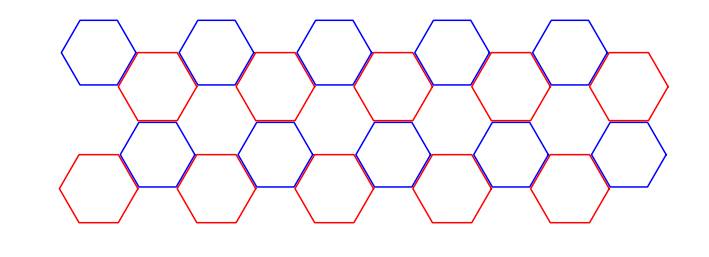

In [23]:
T = np.linspace(0,2*np.pi,7)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')
X, Y = np.cos(T)  , np.sin(T)

for i in range(5):
    ax.plot(X + 3*i,Y,'r')

px, py  = sum(X[0:2]), sum(Y[0:2])
qx, qy = 0, sum(Y[1:3])

ff = .95
for i in range(5):
    ax.plot(ff*X + px + 3*i ,ff*Y + py ,'b')
    
for i in range(5):
    ax.plot(X + 3*i + px, Y + 1.5*qy ,'r')


for i in range(5):
    ax.plot(ff*X +  3*i ,ff*Y + 4*py ,'b')
    

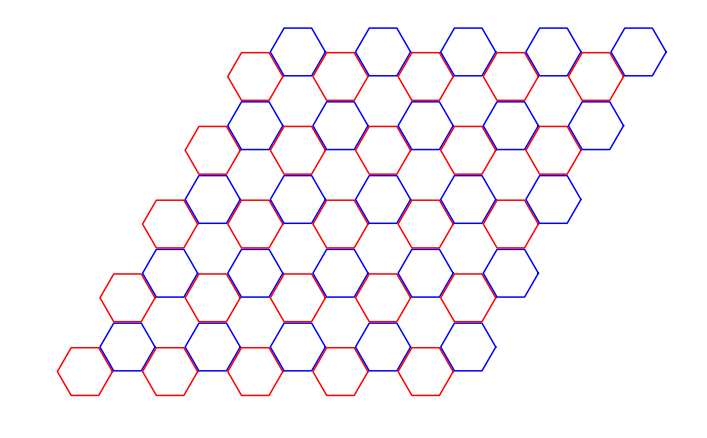

In [94]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')

T = np.linspace(0,2*np.pi,7)
pts = np.stack([np.cos(T), np.sin(T)], axis=1)

ff = .97

yd = 3*pts[1]
xd = 3*pts[0]
qd = pts[1] + pts[0]

for j in range(5):
    for i in range(5):
        A = ff * pts + (i*xd + j*yd)
        ax.plot(A[:,0], A[:,1],'r')
        A += qd
        ax.plot(A[:,0], A[:,1],'b')



In [64]:
mat=np.arange(15)
mat.shape=(5,3)

vec = 10*np.ones(3)
mat + vec[np.newaxis,:]

V + np.array([1,0])

array([[  2.00000000e+00,   0.00000000e+00],
       [  1.50000000e+00,   8.66025404e-01],
       [  5.00000000e-01,   8.66025404e-01],
       [  0.00000000e+00,   1.22464680e-16],
       [  5.00000000e-01,  -8.66025404e-01],
       [  1.50000000e+00,  -8.66025404e-01],
       [  2.00000000e+00,  -2.44929360e-16]])

In [40]:
V[1,:]

IndexError: too many indices for array

In [1]:
for p in [13, 7, 3 ]:
    XX = np.stack([ pts[ p*k % len(pts) ] for k in range(87)])
    plt.plot(XX[:,0], XX[:,1])
    

NameError: name 'np' is not defined

In [46]:
segs = [(x,y) for x,y in zip(U,U[1:]) ]